<a href="https://colab.research.google.com/github/siva-Parvathi-M/Siva/blob/main/Automated_Data_Pipeline_and_Visualization_using_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install pyspark pandas openpyxl

In [36]:
from google.colab import drive

**Convert Excel to CSV**

In [37]:
import pandas as pd

# Define file path
excel_path = "/content/drive/MyDrive/Colab Notebooks/Input Files/Online Retail Data Set.xlsx"
csv_path = "/content/drive/MyDrive/Colab Notebooks/Input Files/Online_Retail_Data_Set.csv"

# Read Excel and save as CSV
df = pd.read_excel(excel_path)
df.to_csv(csv_path, index=False)

**Create Spark Session**

In [38]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder \
    .appName("AutomatedPipeline") \
    .getOrCreate()



**Read the CSV in PySpark**

In [39]:
# Read CSV file
df_spark = spark.read.csv(csv_path, header=True, inferSchema=True)

# Show first few rows
df_spark.show(20)


+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+------------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|           Revenue|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|15.299999999999999|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|              22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|    

**Data Transformation**

In [40]:
from pyspark.sql.functions import col

df_spark = df_spark.select([col(c).alias(c.lower()) for c in df_spark.columns])
df_spark.show(10)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+------------------+
|invoiceno|stockcode|         description|quantity|        invoicedate|unitprice|customerid|       country|           revenue|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|15.299999999999999|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|              22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|    

In [41]:
df_spark = df_spark.dropna()

In [42]:
df_spark = df_spark.withColumn("total_price", col("quantity") * col("unitprice"))
df_spark.show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+------------------+------------------+
|invoiceno|stockcode|         description|quantity|        invoicedate|unitprice|customerid|       country|           revenue|       total_price|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+------------------+------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|15.299999999999999|15.299999999999999|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|             20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|              22.0|              22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.3

**Save Transformed Data**

In [43]:
output_path = "/content/drive/MyDrive/Colab Notebooks/Target Files"
df_spark.write.parquet(output_path, mode="overwrite")

In [44]:
output_path = "/content/drive/MyDrive/Colab Notebooks/Target Files"

In [45]:
# Read the Parquet file
df_output = spark.read.parquet(output_path)

# Show the first few rows
df_output.show(10)


+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+------------------+------------------+
|invoiceno|stockcode|         description|quantity|        invoicedate|unitprice|customerid|       country|           revenue|       total_price|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+------------------+------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|15.299999999999999|15.299999999999999|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|             20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|              22.0|              22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.3

**Automate the Pipeline and Visualization**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

🔄 Running Data Pipeline...


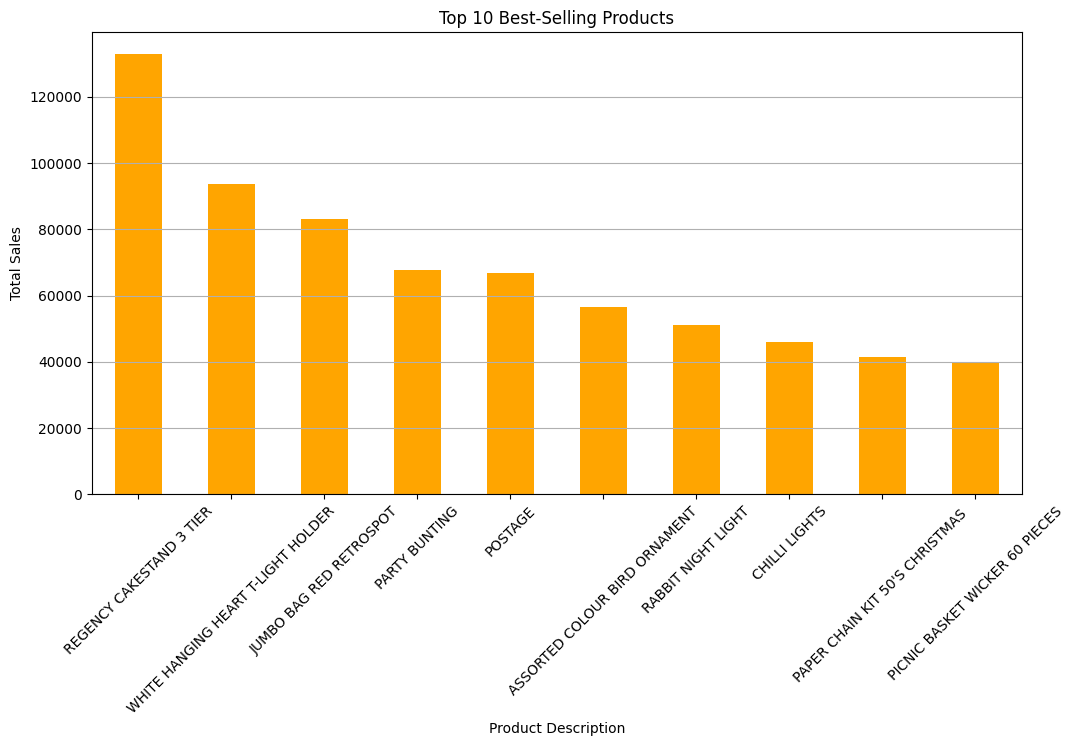

✅ Data pipeline executed successfully!

⏳ Waiting for 30 seconds before the next execution...


🔄 Running Data Pipeline...


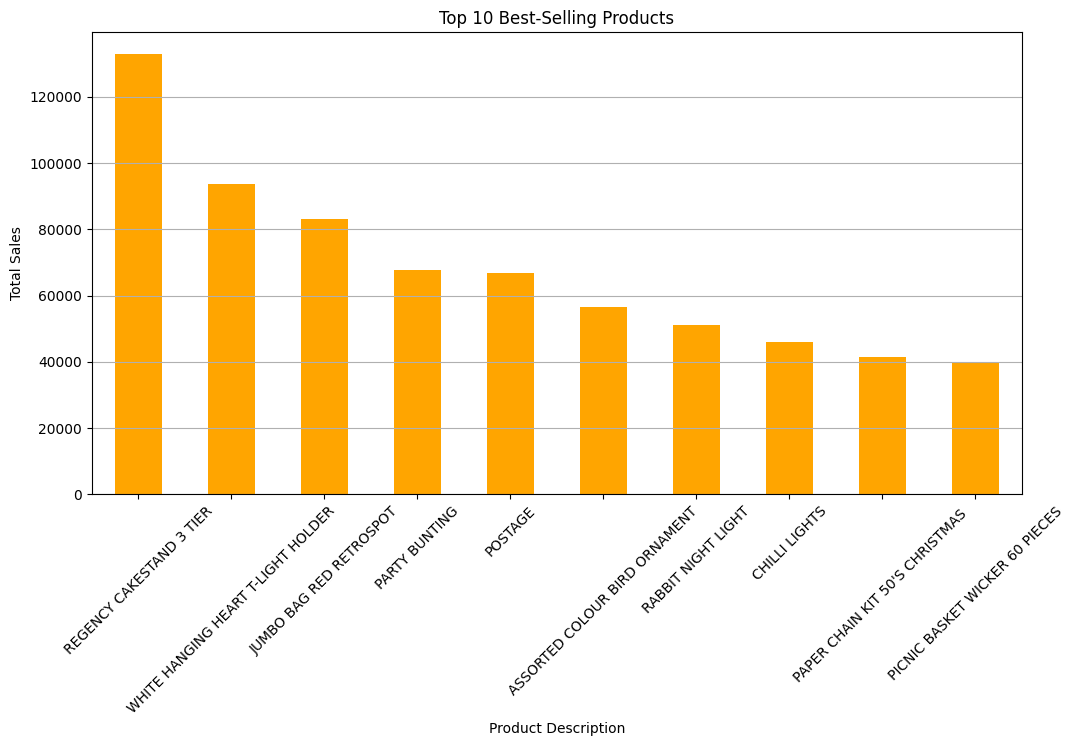

✅ Data pipeline executed successfully!

⏳ Waiting for 30 seconds before the next execution...


🔄 Running Data Pipeline...


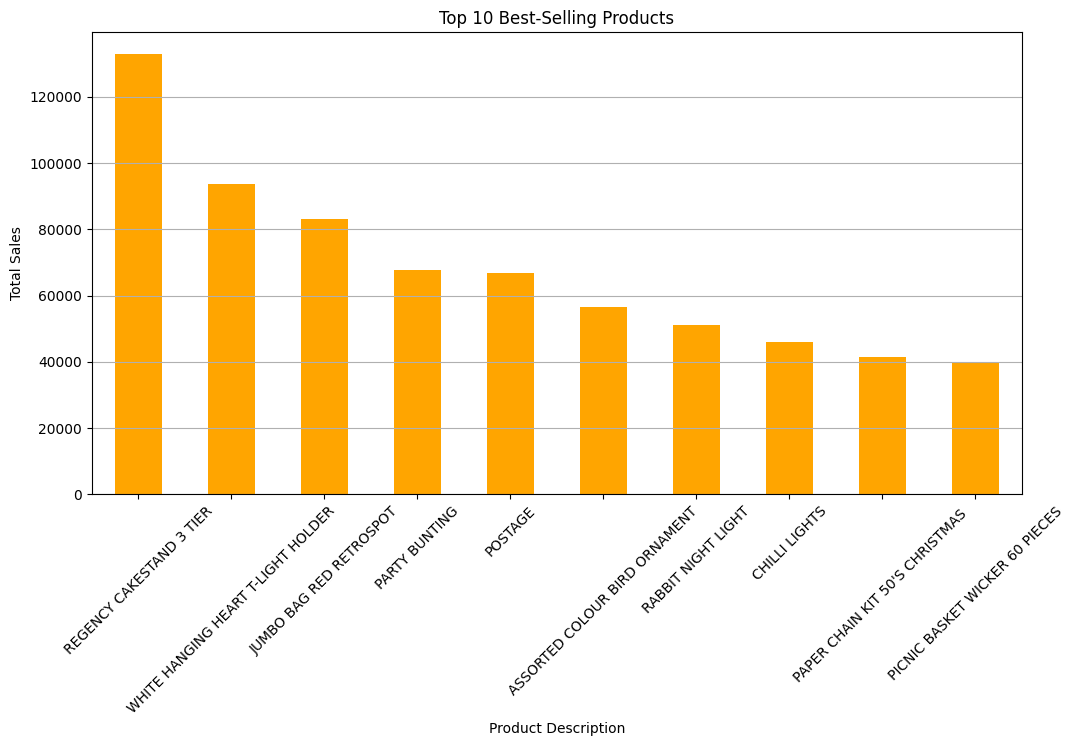

✅ Data pipeline executed successfully!

⏳ Waiting for 30 seconds before the next execution...


🔄 Running Data Pipeline...


In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define File Paths
input_excel = "/content/drive/MyDrive/Colab Notebooks/Input Files/Online Retail Data Set.xlsx"
output_path = "/content/drive/MyDrive/Colab Notebooks/Output Files/Processed_Online_Retail.csv"
visualization_output = "/content/drive/MyDrive/Colab Notebooks/Output Files/visualization.png"

# Step 3: Initialize Spark Session
spark = SparkSession.builder.appName("AutomatedPipeline").getOrCreate()

# Function to Run the Automated Data Pipeline
def run_pipeline():
    print("\n🔄 Running Data Pipeline...")

    # Step 4: Convert Excel to CSV (PySpark Compatibility)
    csv_path = "/content/drive/MyDrive/Colab Notebooks/Input Files/Online_Retail_Data_Set.csv"
    df = pd.read_excel(input_excel)
    df.to_csv(csv_path, index=False)

    # Step 5: Read Data in PySpark
    df_spark = spark.read.csv(csv_path, header=True, inferSchema=True)

    # Step 6: Data Transformations
    df_spark = df_spark.select([col(c).alias(c.lower()) for c in df_spark.columns])  # Lowercase columns
    df_spark = df_spark.dropna()  # Remove null values
    df_spark = df_spark.withColumn("total_price", col("quantity") * col("unitprice"))  # Calculate total price

    # Step 7: Save Processed Data as CSV
    df_spark.write.mode("overwrite").csv(output_path, header=True)

    # Step 8: Convert to Pandas for Visualization
    df_pd = df_spark.toPandas()

    # Step 9: Generate Visualization - Total Sales Per Product
    plt.figure(figsize=(12, 6))
    df_pd.groupby("description")["total_price"].sum().nlargest(10).plot(kind="bar", color="orange")
    plt.xlabel("Product Description")
    plt.ylabel("Total Sales")
    plt.title("Top 10 Best-Selling Products")
    plt.xticks(rotation=45)
    plt.grid(axis="y")

    # Save visualization
    plt.savefig(visualization_output)
    plt.show()

    print("✅ Data pipeline executed successfully!\n")

# Step 10: Run the Pipeline Every 30 Seconds
while True:
    run_pipeline()
    print("⏳ Waiting for 30 seconds before the next execution...\n")
    time.sleep(30)  # Wait for 30 seconds
